## Part 1: Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/judy/Desktop/cu/anomaly detection/health_data_clustering.csv")

In [3]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,avg covered charges/Average_Covered_Charges_by_Hospital,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital,avg medicare payment/Average_Medicare_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,0.935201,2093.38,5683.385,7678.214348,32095.75,5990.735366,706395.72,0.620422,1.212756,0.824568
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,0.919808,2467.15,4976.710,5793.631429,13342.72,2784.451480,283887.94,0.858997,1.162931,0.859896
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,1.016729,1704.53,5228.300,7145.959535,32248.64,5636.247698,614552.52,0.623260,1.220298,0.819472
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,0.504304,2076.82,4842.360,6810.429310,29393.46,5032.249163,592507.35,0.606300,1.312025,0.762181
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,0.796244,2116.02,5183.575,6563.419000,29031.62,4435.211822,525073.52,0.739164,1.166320,0.857398


In [4]:
features = ['total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'avg total payment/Average_Total_Payment_by_Hospital',
       'avg covered charges/Average_Covered_Charges_by_Hospital',
       'avg medicare payment/Average_Medicare_Payment_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment']

In [5]:
df_clustering = df[features]

In [6]:
df_clustering.columns

Index(['total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'avg total payment/Average_Total_Payment_by_Hospital',
       'avg covered charges/Average_Covered_Charges_by_Hospital',
       'avg medicare payment/Average_Medicare_Payment_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment'],
      dtype='object')

In [7]:
len(df_clustering.columns)

11

In [8]:
df_clustering.isnull().sum()

total discharge/Average_Total_Discharge_by_DRG_definition ratio                      0
avg total payments/Average_Total_Payment_by_DRG_definition                           0
avg total payments/Average_Total_Payment_by_DRG_definition_by_State                  0
avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State       0
avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State    0
total_discharges/Average_Total_Discharge_by_Hospital                                 0
avg total payment/Average_Total_Payment_by_Hospital                                  0
avg covered charges/Average_Covered_Charges_by_Hospital                              0
avg medicare payment/Average_Medicare_Payment_by_Hospital                            0
charge/medicare ratio                                                                0
percentage of medciare payment to total payment                                      0
dtype: int64

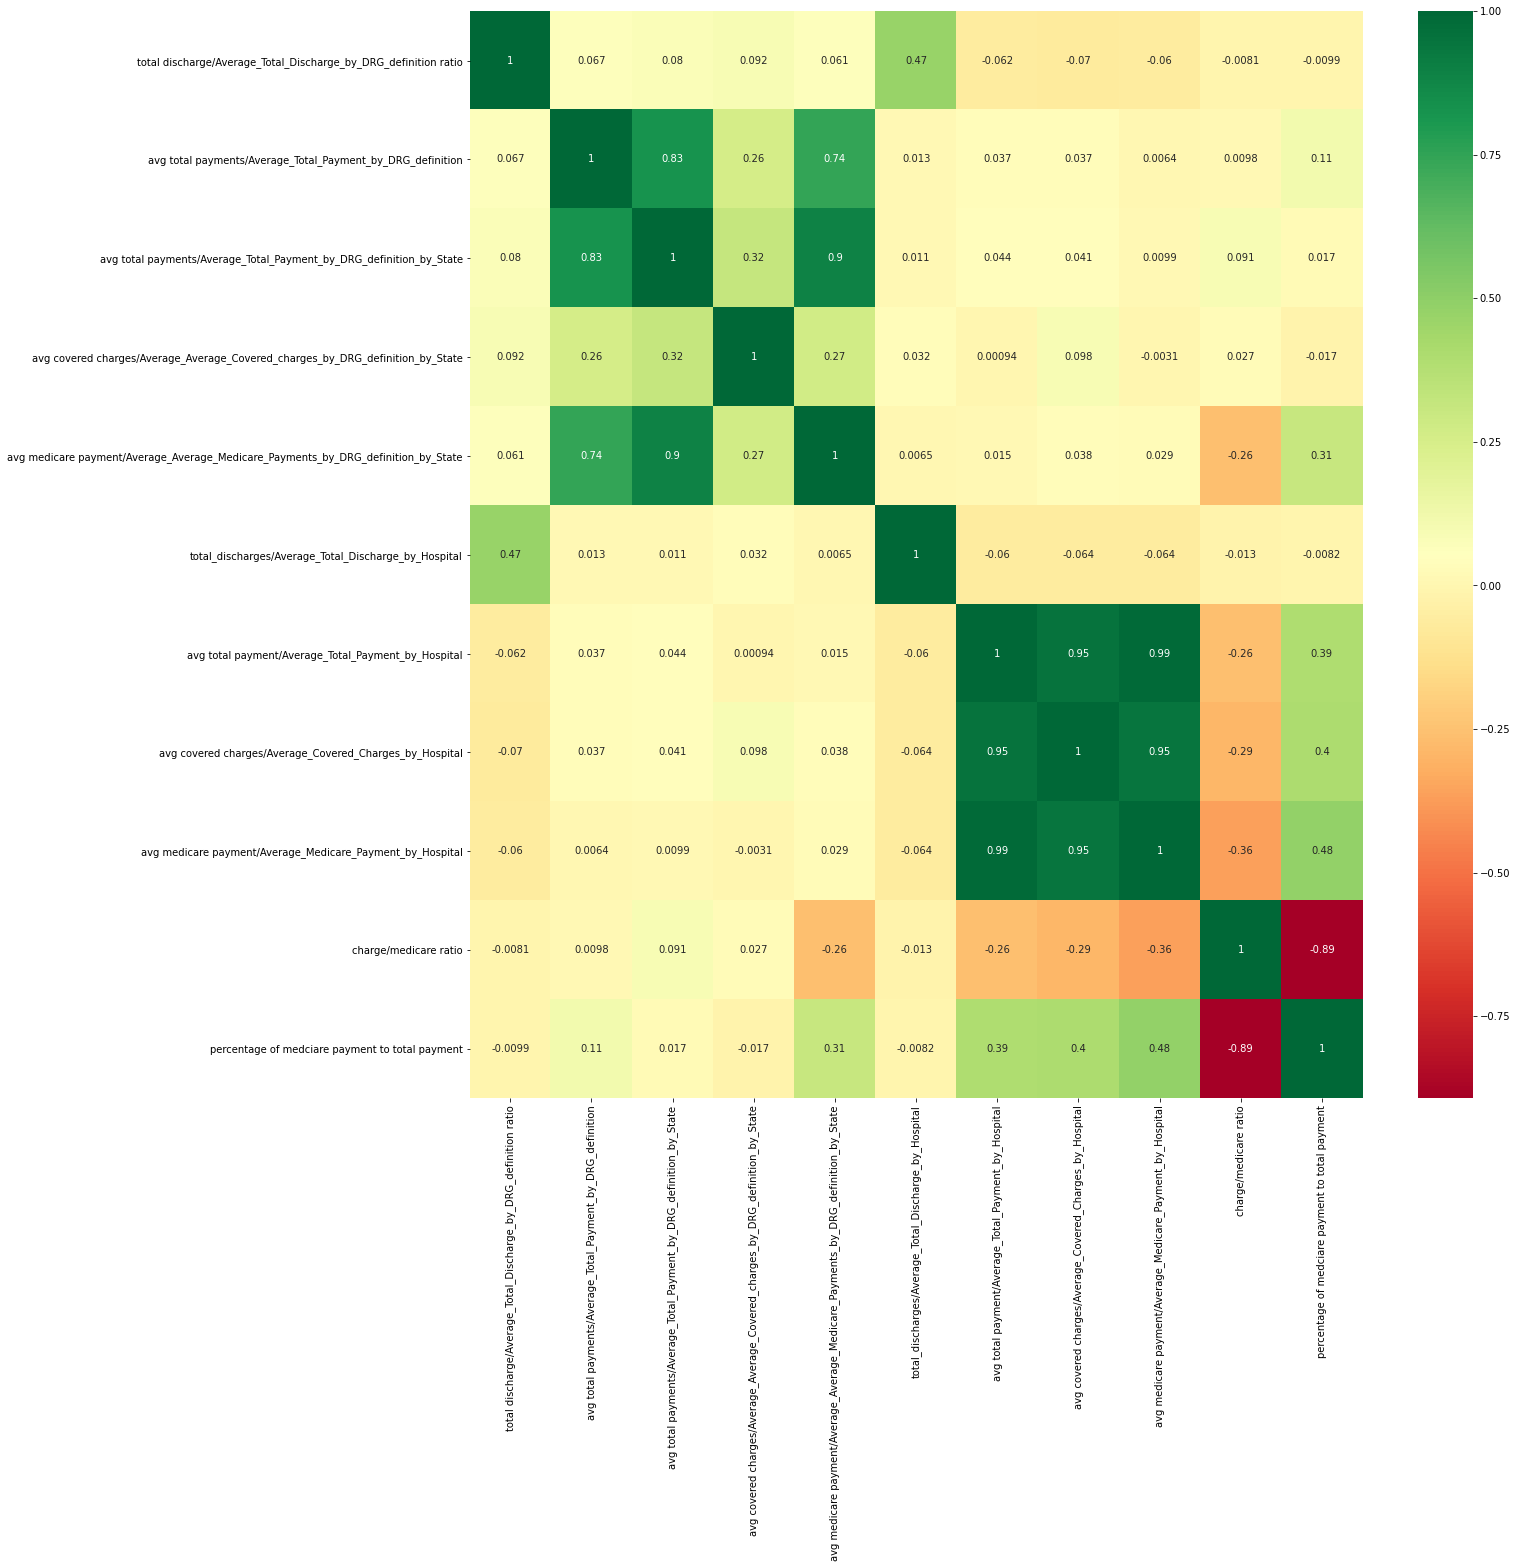

In [9]:
# Correlation Matrix with Heatmap
X = df_clustering.iloc[::]  #independent columns
y = df_clustering.iloc[::]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_clustering.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_clustering[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [11]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_clustering.columns[columns]
data = df_clustering[selected_columns]

In [12]:
data.columns

Index(['total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'avg total payment/Average_Total_Payment_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment'],
      dtype='object')

In [13]:
len(data.columns)

9

Now the dataset has only those columns with with correlation less than 0.9. We have cut down the features from 11 to 9. 

## Part2: KNN, PCA & Anomaly Analysis

## 1. KNN

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [15]:
#standardization
#Method 1:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)
standardized_X = preprocessing.scale(data)

In [16]:
print(standardized_X)

[[ 2.52841218 -0.68477316  0.02998315 ... -0.49906783  0.09263843
  -0.24998292]
 [-0.72427148 -0.67879518  0.03919344 ... -0.22098192 -0.20071286
   0.15187496]
 [-0.30184503 -0.88285665 -0.27520458 ... -0.49511176  0.13704458
  -0.30795457]
 ...
 [-0.42655941  0.73434877  1.18693404 ... -0.54837355  1.22794162
  -1.53673215]
 [-0.80092113  2.36963925  3.35292857 ... -0.46173141 -0.45973047
   0.53645004]
 [-0.75412592 -1.07282532 -1.20672585 ... -0.6986666   0.17017977
  -0.35074742]]


In [17]:
from sklearn import model_selection

# Reserve 25% for testing
X_train, X_test = model_selection.train_test_split(data, test_size=0.25, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 122298 observation with 9 features
test data has 40767 observation with 9 features


In [18]:
# train kNN detector
from pyod.models.knn import KNN
clf_name = 'KNN'
clf = KNN()
clf.fit(standardized_X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [19]:
X_test_scores = clf.decision_function(standardized_X)

In [20]:
X_test_scores

array([0.59632252, 0.37465939, 0.31714357, ..., 0.80814874, 0.55962374,
       0.37177228])

### A high anomaly score suggests that an observation is more abnormal. The histogram below shows there are outliers. If we choose 1.0 to be the cut point, we can suggest those >=1.5 to be outliers.

In [21]:
X = X_test_scores[X_test_scores < 3.5]

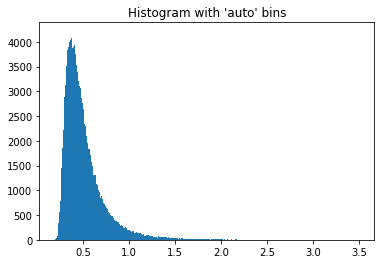

In [22]:
import matplotlib.pyplot as plt
plt.hist(X, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [23]:
# Let's see how many '0's and '1's. We get 161589 '0's and 1381 '1's.
df_test = pd.DataFrame(X)
df_test['score'] = X
df_test['cluster'] = np.where(df_test['score']<1.5, 0, 1)
df_test['cluster'].value_counts()
# Now let's show the summary statistics:
#df_test.groupby('_by_average_cluster').mean()
#df_test.groupby('cluster').mean()

0    161589
1      1381
Name: cluster, dtype: int64

### We will first generate 3 KNN models and collect all the model predictions in one dataset. Each of the observations will have 3 predictions. By training multiple models and then aggregate the scores, we try to reduce the chance of overfitting and improve the prediction accuracy. 

In [24]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
# Standardize data
X_train_norm = X_train
X_test_norm = standardized_X
# Test a range of k-neighbors from 5 to 15. There will be 3 k-NN models.
n_clf = 3
k_list = [5, 10, 15]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([standardized_X.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


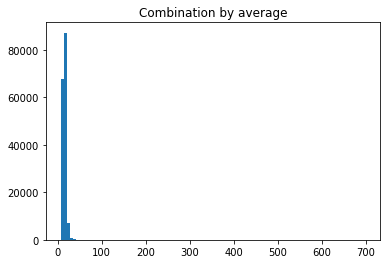

In [25]:
# Combination by average 
x_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(x_by_average, bins=100) # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [45]:
df_test = pd.DataFrame(data)
df_test['x_by_average_score'] = x_by_average
df_test['x_by_average_cluster'] = np.where(df_test['x_by_average_score']< 25, 0, 1)
df_test['x_by_average_cluster'].value_counts()

0    161149
1      1916
Name: x_by_average_cluster, dtype: int64

In [46]:
percent_of_data = (df_test['x_by_average_cluster'].value_counts() / df_test['x_by_average_cluster'].value_counts().sum())*100

In [47]:
percent_of_data

0    98.825008
1     1.174992
Name: x_by_average_cluster, dtype: float64

In [48]:
df_test.groupby('x_by_average_cluster').mean()

,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,avg total payment/Average_Total_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment,x_by_average_score
x_by_average_cluster,,,,,,,,,,
0,1.001785,0.995537,0.996131,0.998375,0.999675,1.002318,0.999295,1.189825,0.849204,14.726510
1,0.849836,1.375392,1.325426,1.136704,1.027316,0.805060,1.059266,1.802242,0.622899,33.017967


### In this case, it identifies 1916 data points (counted for 1.17% for the entire dataset) that have the outlier score higher than 25. And the summary statistics (the average values) for each cluster is illustrated in the table above. The cluster that is identified as 1 is the anomalous cluster. This average anomaly score in Cluster 1 is much higher than that of Cluster 0, and the summary statistics also show dramatic differences between the two clusters. In this way, I believe that the observations in Cluster 1 could be anomalous and requires further investigation.

### KNN calculates Euclidean distance from the test point to each of its k nearest neighbours. In order to achieve the best result for this model, a good feature enginnering as well as feature selection, as well as standardization of numeric variables are two keys. KNN can perform both unsupervised learning and supervised learning algorithms. 

## 2. PCA

In [30]:
# train kNN detector
from pyod.models.pca import PCA
clf_name = 'PCA'
clf = PCA()
clf.fit(standardized_X)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [31]:
X_test_scores = clf.decision_function(standardized_X)
X_test_scores

array([1526.41140372, 1125.82840621,  890.55019891, ..., 1878.61115214,
       3126.77830251, 1363.5486473 ])

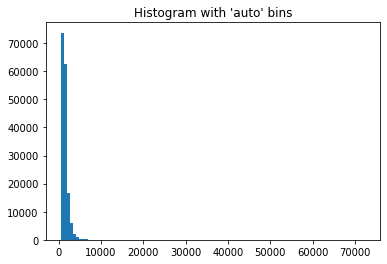

In [32]:
plt.hist(X_test_scores, bins= 100)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

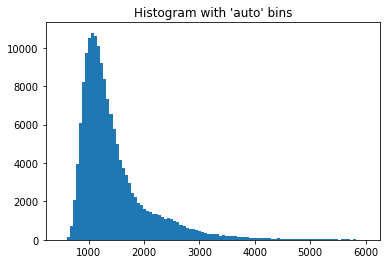

In [33]:
X = X_test_scores[X_test_scores < 6000]
plt.hist(X, bins= 100)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [34]:
# Let's see how many '0's and '1's. We get 162691 '0's and 374 '1's.
df_test = pd.DataFrame(X_test_scores)
df_test['score'] = X_test_scores
df_test['cluster'] = np.where(df_test['score']<6000, 0, 1)
df_test['cluster'].value_counts()
# Now let's show the summary statistics:
#df_test.groupby('_by_average_cluster').mean()
#df_test.groupby('cluster').mean()

0    162691
1       374
Name: cluster, dtype: int64

In [35]:
percent_of_data = (df_test['cluster'].value_counts() / df_test['cluster'].value_counts().sum())*100

In [36]:
percent_of_data

0    99.770644
1     0.229356
Name: cluster, dtype: float64

In [49]:
# Standardize data
X_train_norm = X_train
X_test_norm = standardized_X
k_list = [5, 6, 7]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([standardized_X.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    clf = PCA(n_components=k)
    clf.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

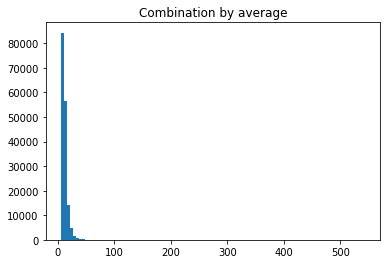

In [50]:
# Combination by average 
x_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(x_by_average, bins=100) # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [51]:
df_test = pd.DataFrame(data)
df_test['x_by_average_score'] = x_by_average
df_test['x_by_average_cluster'] = np.where(df_test['x_by_average_score']< 25, 0, 1)
df_test['x_by_average_cluster'].value_counts()

0    158651
1      4414
Name: x_by_average_cluster, dtype: int64

In [52]:
percent_of_data = (df_test['x_by_average_cluster'].value_counts() / df_test['x_by_average_cluster'].value_counts().sum())*100

In [53]:
percent_of_data

0    97.293104
1     2.706896
Name: x_by_average_cluster, dtype: float64

In [54]:
df_test.groupby('x_by_average_cluster').mean()

,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,avg total payment/Average_Total_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment,x_by_average_score
x_by_average_cluster,,,,,,,,,,
0,1.005457,0.994266,0.994013,0.996627,1.002165,1.007909,1.002860,1.181175,0.853713,11.420109
1,0.803846,1.206102,1.215183,1.121239,0.922199,0.715714,0.897199,1.766585,0.588901,33.014286


### In my PCA model, it identifies 4414 data points (counted for 2.71% for the entire dataset) that have the outlier score higher than 25. And the summary statistics (the average values) for each cluster is illustrated in the table above. The cluster that is identified as 1 is the anomalous cluster. This average anomaly score in Cluster 1 is much higher than that of Cluster 0, and the summary statistics also show dramatic differences between the two clusters. In this way, I believe that the observations in Cluster 1 could be anomalous and requires further investigation.

### PCA stands for Principal component analysis and is a technique for reducing dimensionality of datasets with increasing interpretabuility as well as minimizing information loss. This is achieved by creating new uncorrelated variables, thus maxmizing the variance. For PCA, feature enginnering is not as important as it is in KNN's case as PCA model will be able to handle the features directly.  In PCA, when dimension is reduced, outliers are revealed and this is how I could identify anomalies as illustrated above.